In [3]:
from sklearn.datasets import make_classification, load_iris
from sklearn.ensemble import *
from sklearn.metrics  import *
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.svm          import LinearSVC
from sklearn.tree         import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from plot.PlotRegiaDeDecisao import plotDecisionRegion

In [4]:
X, y = load_iris(return_X_y=True)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.2)

### Voting 

In [5]:
Voting = VotingClassifier(
    estimators = [
        ('logistic', LogisticRegression()),
        ('Gradient', SGDClassifier()),
        ('LinearSVS', LinearSVC(dual=False))
        
    ],
    voting='hard'
)
Voting.fit(xtrain,ytrain)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('Gradient', SGDClassifier()),
                             ('LinearSVS', LinearSVC(dual=False))])

In [6]:
pred = Voting.predict(xtest)

In [7]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



&nbsp;

## Bagging & Pasting

In [8]:
bagging = BaggingClassifier(
    estimator   = DecisionTreeClassifier(random_state=42),
    max_samples = 60,
    n_estimators= 2,
    max_features=1,
    bootstrap   = False
)
bagging.fit(xtrain[:,:2],ytrain)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(random_state=42),
                  max_features=1, max_samples=60, n_estimators=2)

In [9]:
bagging.estimators_samples_[0]==bagging.estimators_samples_[1]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False])

In [10]:
pred = bagging.predict(xtest[:,:2])

In [11]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.43      0.33      0.38         9
           2       0.47      0.73      0.57        11

    accuracy                           0.53        30
   macro avg       0.58      0.52      0.52        30
weighted avg       0.58      0.53      0.53        30



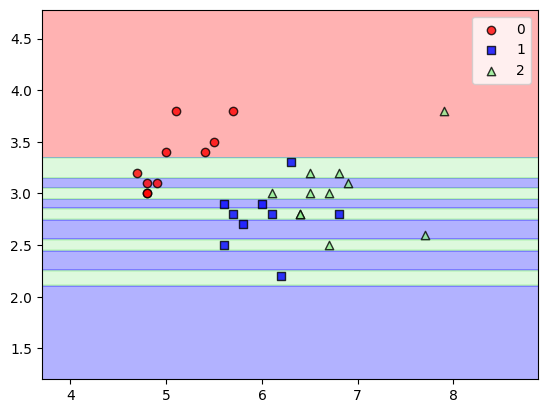

In [12]:
plotDecisionRegion(xtest[:,:2],ytest,bagging)

In [24]:
ada = AdaBoostClassifier(estimator=LogisticRegression(max_iter=1000),n_estimators=49, algorithm='SAMME.R')
ada.fit(xtrain[:,2:],ytrain)

c:\Users\mateu\Documents\venvGlobal\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=49)

In [25]:
ada.estimator_errors_

array([0.1       , 0.250806  , 0.24461632, 0.25840395, 0.2697988 ,
       0.25441544, 0.26259779, 0.26780296, 0.26781511, 0.27856651,
       0.27388809, 0.28283162, 0.28579254, 0.29279521, 0.29870667,
       0.28808532, 0.28490354, 0.28212694, 0.27824767, 0.27304409,
       0.27855217, 0.28345165, 0.28777585, 0.29336275, 0.29846355,
       0.28887384, 0.28317812, 0.28661257, 0.28964129, 0.29233125,
       0.26242297, 0.25456731, 0.25921888, 0.26351229, 0.26742037,
       0.27100589, 0.27426061, 0.27720676, 0.28163064, 0.28393311,
       0.28600002, 0.28784986, 0.28951749, 0.29098721, 0.29228831,
       0.2934357 , 0.2944431 , 0.29532311, 0.2960689 ])

In [26]:
pred = ada.predict(xtest[:,2:])

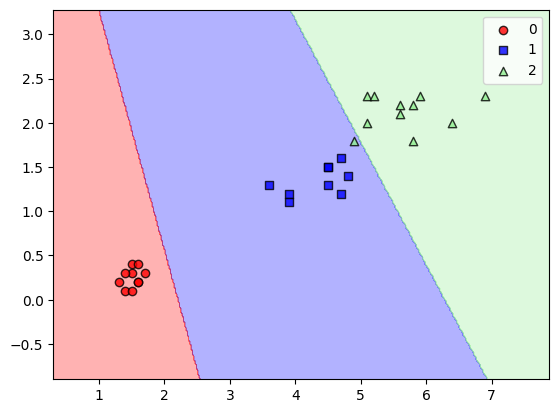

In [39]:
plotDecisionRegion(xtest[:,2:],ytest,ada)

In [61]:
gradBoost = GradientBoostingClassifier(
    criterion='squared_error',
    max_depth=5,
    n_estimators=200,

)
gradBoost.fit(xtrain[:,2:],ytrain)

GradientBoostingClassifier(criterion='squared_error', max_depth=5,
                           n_estimators=200)

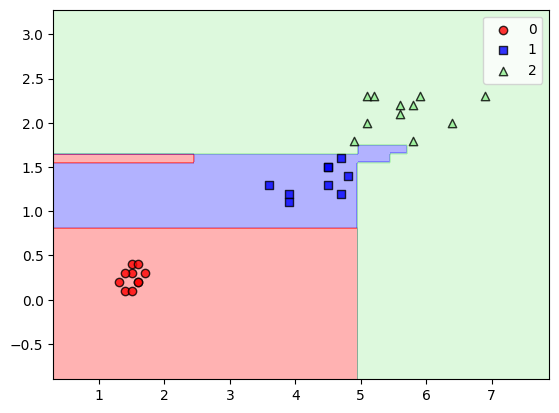

In [62]:
plotDecisionRegion(xtest[:,2:],ytest,gradBoost)

3